<a href="https://colab.research.google.com/github/Haris-09/Machine-Learning/blob/main/Support_Vector_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/My Drive/NAVTCC: Data Science & AI' # Replace with your file path
ansur = pd.read_csv(file_path+'/ansur.csv', encoding='latin-1')
ansur.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [4]:
# Dropping categorical columns
ansur_numeric = ansur.select_dtypes(include=['number'])
ansur_numeric.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
0,10027,266,1467,337,222,1347,253,202,401,369,...,440,1054,815,175,853,1,1,41,71,180
1,10032,233,1395,326,220,1293,245,193,394,338,...,371,1054,726,167,815,1,1,35,68,160
2,10033,287,1430,341,230,1327,256,196,427,408,...,411,1041,929,180,831,2,2,42,68,205
3,10092,234,1347,310,230,1239,262,199,401,359,...,399,968,794,176,793,1,1,31,66,175
4,10093,250,1585,372,247,1478,267,224,435,356,...,379,1245,946,188,954,2,2,21,77,213


In [5]:
# splitting labels and features
y = ansur_numeric['Weightlbs']
X = ansur_numeric.drop('Weightlbs', axis=1)

In [6]:
# splitting data 70% for training 30% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
# using support vector classifier
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

SVC()

In [8]:
# predicting and testing accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, svc.predict(X_test))
print(f"Accuracy: {accuracy}")

Accuracy: 0.05551020408163265


In [9]:
accuracy = accuracy_score(y_train, svc.predict(X_train))
print(f"Accuracy: {accuracy}")

Accuracy: 0.051452572628631434


In [10]:
ansur.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [11]:
from sklearn.model_selection import train_test_split
y = ansur['Branch']
X = ansur.drop('Branch', axis=1)
X = X.select_dtypes(include=['number'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(f"{X_test.shape[0]} rows in test set vs. {X_train.shape[0]} in training set, {X_test.shape[1]} features.")

1225 rows in test set vs. 2857 in training set, 99 features.


In [12]:
# Import SVC form sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Calssification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_test = accuracy_score(y_test, svc.predict(X_test))
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")

48.0% accuracy on test set vs. 46.6% on training set


<Axes: xlabel='Branch', ylabel='Count'>

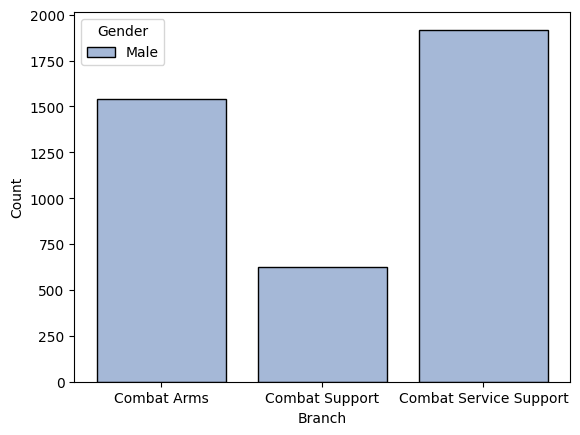

In [13]:
import seaborn as sns
sns.histplot(data=ansur, x='Branch', palette='deep', hue='Gender', shrink=.8)

In [14]:
ansur.shape

(4082, 108)